In [279]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus
import seaborn as sns

In [280]:
df = pd.read_csv('energy_source2.csv')
print("The number of rows in the dataset is",len(df))
print("The number of columns in  the data set is",len(df.columns))
print("The columns present in the data set is",df.columns)
df.head()

The number of rows in the dataset is 36000
The number of columns in  the data set is 14
The columns present in the data set is Index(['measure', 'year', 'month', 'sector', 'size', 'district', 'elevation',
       'floors', 'built', 'tmp_min', 'tmp_mean', 'tmp_max', 'cost', 'source'],
      dtype='object')


,measure,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost,source
0,0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,34.6,6198.82,gas
1,1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,39.7,6603.26,gas
2,2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,34.2,1343.66,gas
3,3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,32.2,608.22,gas
4,4,2012.0,10.0,residential,NaN,3,-7.0,7.0,NaN,17.9,23.0,29.0,1888.29,elec


In [281]:
#summary of the data set
df_copy = df.copy()
df_copy1 = df[:]

df.describe()

,measure,year,month,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost
count,36000.000000,35471.000000,34583.000000,33374.000000,36000.000000,35424.000000,34512.000000,35431.000000,34645.000000,36000.000000,32496.000000,33349.00000
mean,17999.500000,2009.499704,6.500361,656.131030,4.486667,101.452942,7.910611,1966.782592,17.637988,24.058986,30.482232,4848.17067
std,10392.449182,2.871468,3.453408,561.181651,2.333090,100.214500,7.743878,26.525973,5.980053,5.488823,5.471901,6269.75903
min,0.000000,2005.000000,1.000000,122.000000,1.000000,-7.000000,1.000000,1920.000000,0.800000,12.800000,17.300000,7.75000
25%,8999.750000,2007.000000,3.000000,339.000000,2.000000,19.000000,3.000000,1944.000000,12.900000,19.500000,26.000000,1182.76000
50%,17999.500000,2009.000000,7.000000,497.000000,5.000000,55.000000,5.000000,1965.000000,18.700000,25.100000,31.700000,2625.02000
75%,26999.250000,2012.000000,10.000000,831.000000,6.000000,172.000000,9.000000,1992.000000,22.700000,29.200000,35.100000,5793.55000
max,35999.000000,2014.000000,12.000000,5947.000000,8.000000,337.000000,29.000000,2009.000000,77.700000,32.400000,43.900000,65493.79000


In [282]:
#The different data types of the features are
df.dtypes

measure        int64
year         float64
month        float64
sector        object
size         float64
district       int64
elevation    float64
floors       float64
built        float64
tmp_min      float64
tmp_mean     float64
tmp_max      float64
cost         float64
source        object
dtype: object

**Initial Data Analysis**

In [283]:
#Lets remove the measure feature from the data set since we already have an index by default

df.drop('measure',inplace= True,axis = 1)


In [284]:
#lets check for the number of null values in each feature

df.isna().sum()

year          529
month        1417
sector       2618
size         2626
district        0
elevation     576
floors       1488
built         569
tmp_min      1355
tmp_mean        0
tmp_max      3504
cost         2651
source          0
dtype: int64

In [285]:
#We will remove rows from year,month and sector, and built year that has null values

df = df[df['year'].notna() & df['month'].notna() & df['sector'].notna() & df['built'].notna()]

df.isna().sum()


year            0
month           0
sector          0
size         2247
district        0
elevation     510
floors       1290
built           0
tmp_min      1169
tmp_mean        0
tmp_max      3033
cost         2284
source          0
dtype: int64

In [286]:
#lets replace the size, elevation, floors, tmp_min,tmp_max,cost with its median value
df['size'] = df['size'].fillna((df['size'].median()))
df['elevation'] = df['elevation'].fillna((df['elevation'].median()))
df['floors'] = df['floors'].fillna((df['floors'].median()))

df['tmp_min'] = df['tmp_min'].fillna((df['tmp_min'].median()))
df['tmp_max'] = df['tmp_max'].fillna((df['tmp_max'].median()))
df['cost'] = df['cost'].fillna((df['cost'].median()))

In [287]:
df.isna().sum()


year         0
month        0
sector       0
size         0
district     0
elevation    0
floors       0
built        0
tmp_min      0
tmp_mean     0
tmp_max      0
cost         0
source       0
dtype: int64

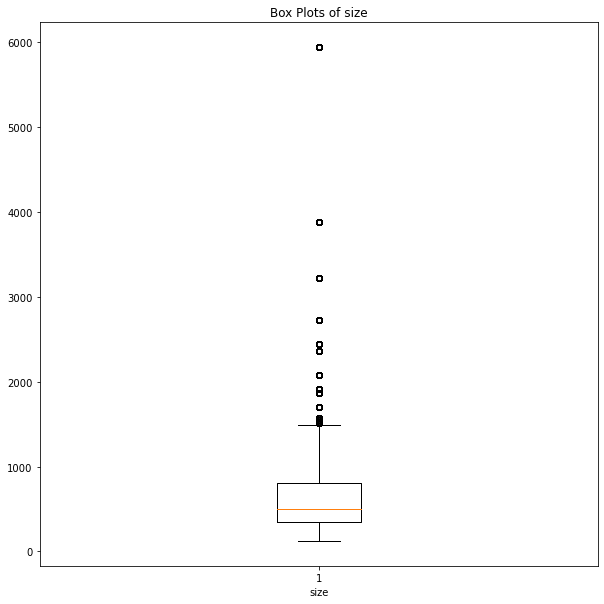

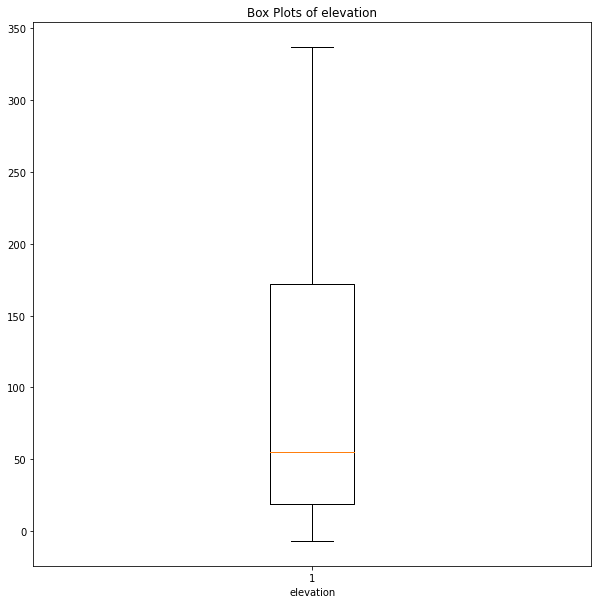

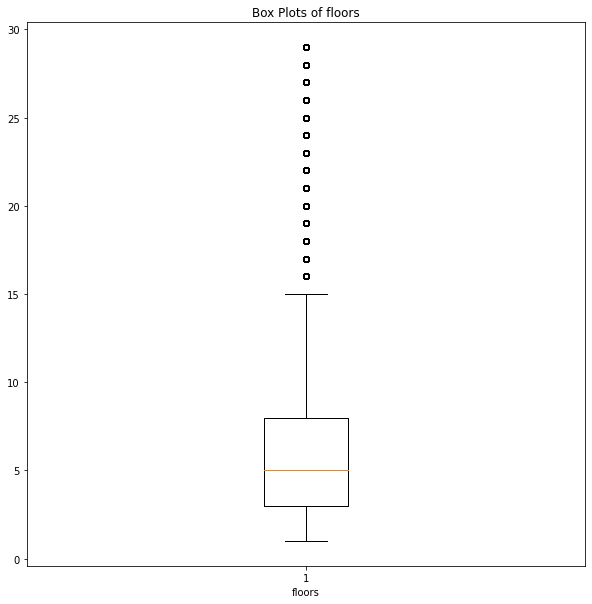

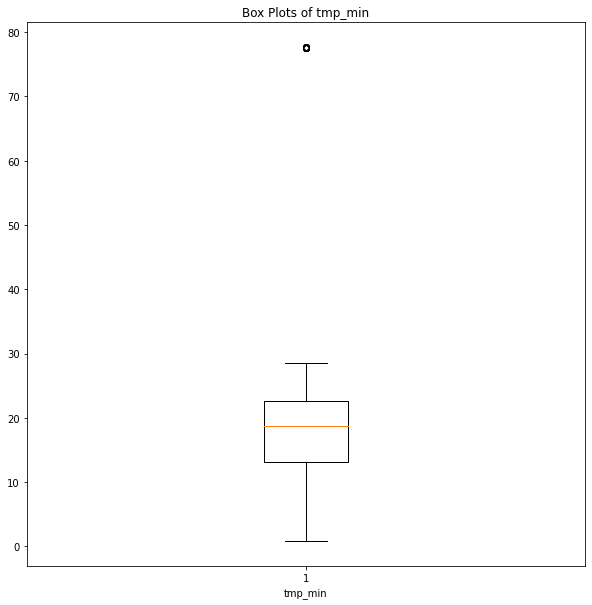

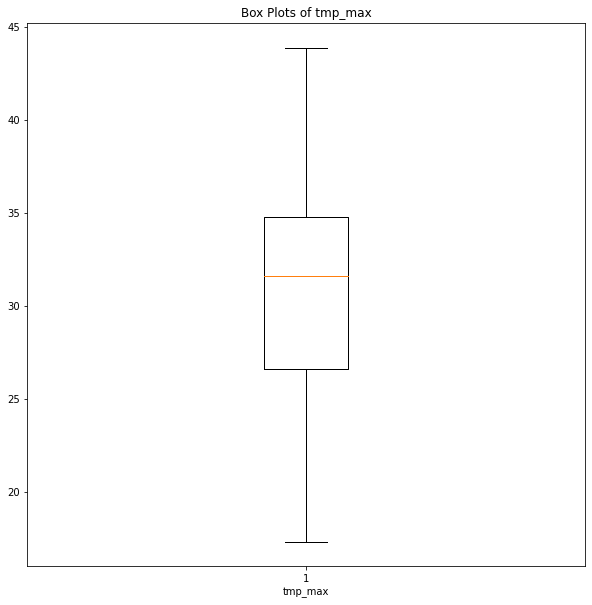

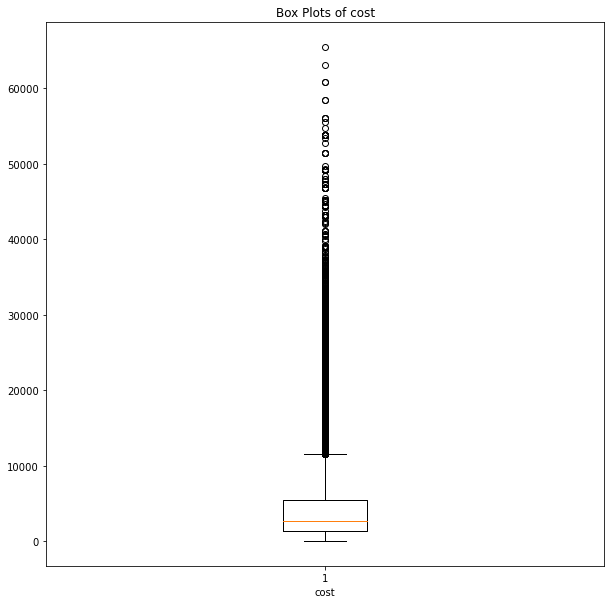

In [288]:
#lets check for outliers using boxplots


L1 = ['size','elevation','floors','tmp_min','tmp_max','cost']
for i in L1:  

    plt.figure(figsize=(10,10))

    plt.boxplot(df[i])

    plt.xlabel(i)

    plt.title('Box Plots of ' + str(i))

    plt.show()

**We can see a few outliers in the cost feature. Lets go ahead and remove those rows**

In [289]:
df = df[df['cost'] <= 50000]

In [290]:
print("The number of rows after pre processing is",len(df))

The number of rows after pre processing is 31067


Exploratory Data Analysis

**Lets analyse the correlation between features which are continuous nature**

In [291]:
df1 = pd.DataFrame(df,columns = ['size','elevation','floors','tmp_min','tmp_max','cost'])
df1.corr().abs()

,size,elevation,floors,tmp_min,tmp_max,cost
size,1.000000,0.077062,0.035680,0.009134,0.005102,0.393474
elevation,0.077062,1.000000,0.028844,0.003021,0.003300,0.050526
floors,0.035680,0.028844,1.000000,0.001409,0.001354,0.597677
tmp_min,0.009134,0.003021,0.001409,1.000000,0.845785,0.028894
tmp_max,0.005102,0.003300,0.001354,0.845785,1.000000,0.031496
cost,0.393474,0.050526,0.597677,0.028894,0.031496,1.000000


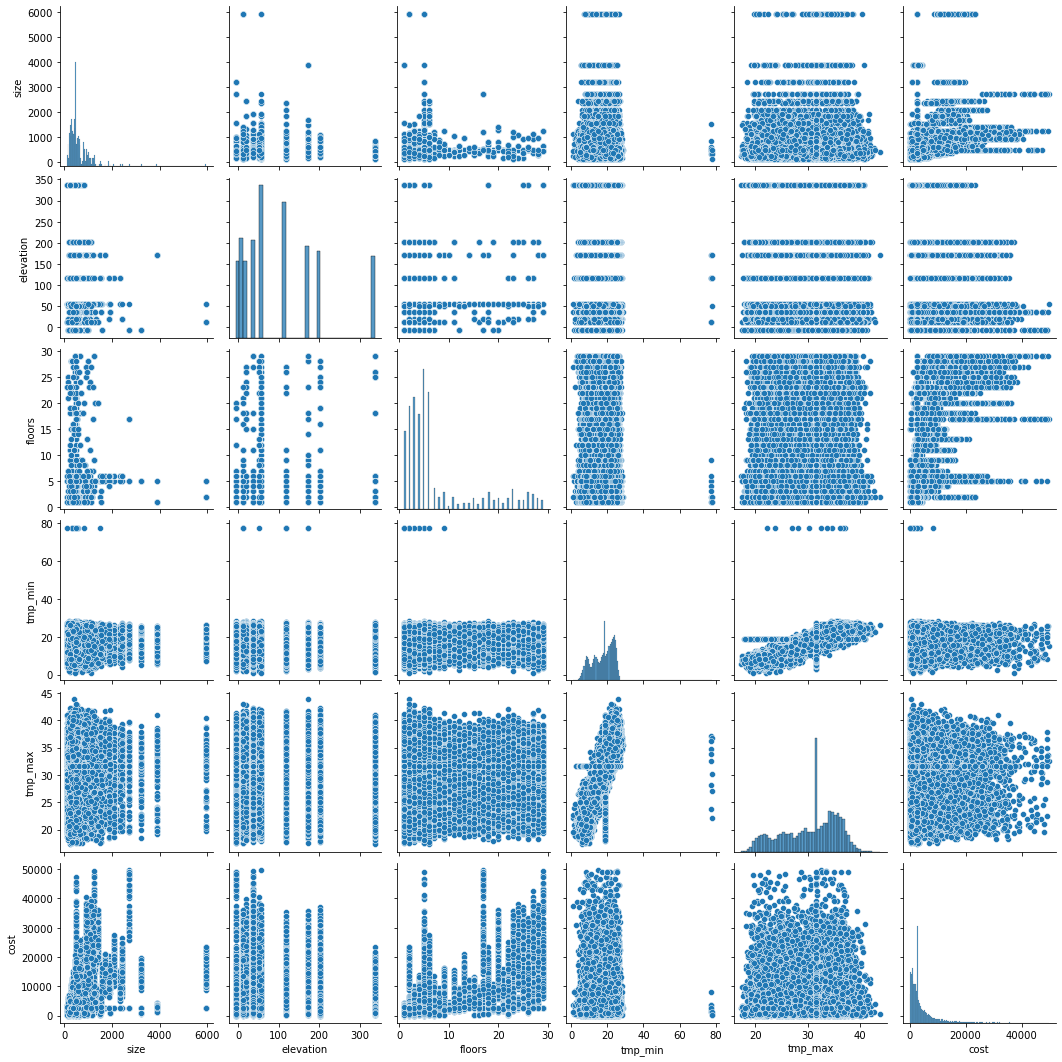

In [292]:
#llets check the correlation between each features using seaborn pair plot
sns.pairplot(df1)

**#Lets check the distibutions of each feature**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028622681438>,
      dtype=object)

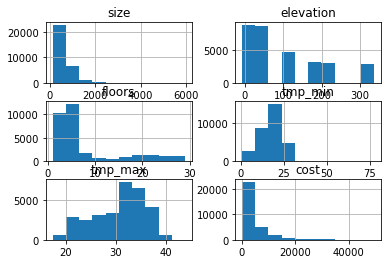

In [293]:
df1.hist()

Text(0.5, 1.0, 'Number of instances for each category')

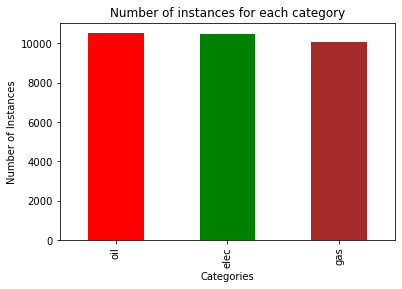

In [294]:
#lets check for the number of instances of each class present in the target variable

df['source'].value_counts().plot(kind = 'bar',color = ['red','green','brown'])
plt.xlabel('Categories')
plt.ylabel('Number of Instances')
plt.title('Number of instances for each category')

**#lets check for the mean cost of heating across the years**

Text(0.5, 1.0, 'Year vs Cost')

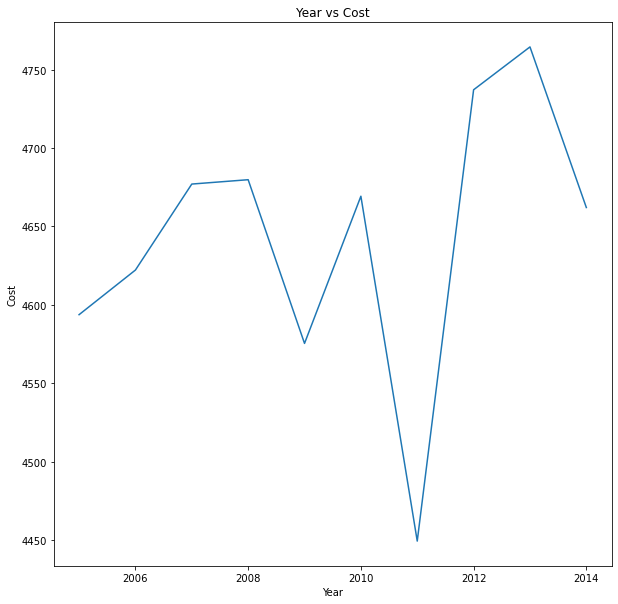

In [295]:

df2 = pd.DataFrame(df.groupby('year')['cost'].mean().reset_index())
plt.figure(figsize= (10,10))
plt.plot(df2['year'],df2['cost'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Year vs Cost')

**#lets check for the mean cost of heating across the built**

Text(0.5, 1.0, 'built vs Cost')

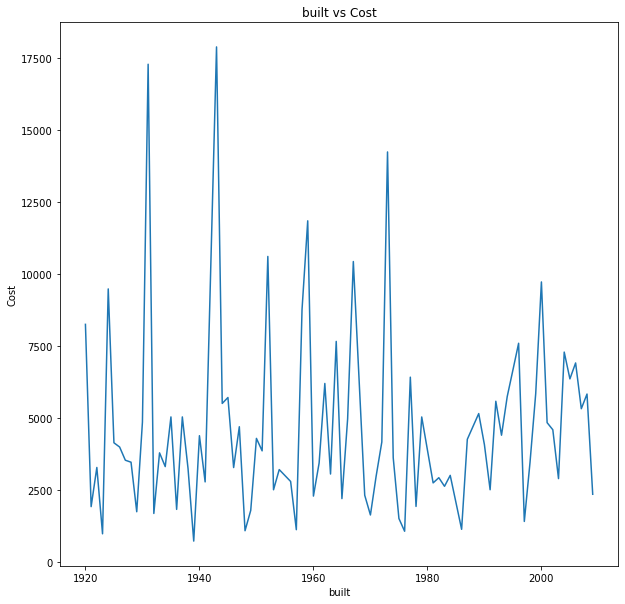

In [296]:
#lets check for the mean cost of heating across the built
df2 = pd.DataFrame(df.groupby('built')['cost'].mean().reset_index())
plt.figure(figsize= (10,10))
plt.plot(df2['built'],df2['cost'])
plt.xlabel('built')
plt.ylabel('Cost')
plt.title('built vs Cost')

**Additional Data Pre Processing**

Since there is a high correlation between tmp_max and tmp_min we go ahead and remove tmp_max since most of the ML models assumes feature independence

In [297]:
df.drop('tmp_max',axis = 1,inplace = True)

**One-Hot Encoding:**
One-Hot encoding takes categorical data and transforms it into a boolean vector, where each value in the vector will be 0, except for the one representing the category index of the data



In [298]:



df_oh=df.copy()


look_up1 = {1: 'district_1', 2: 'district_2', 3: 'district_3', 4: 'district_4', 5: 'district_5',
            6: 'district_6', 7: 'district_7', 8: 'district_8'}

df_oh['district'] =df_oh['district'].apply(lambda x: look_up1[x])
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_oh['month'] = df_oh['month'].apply(lambda x: look_up[x])

df_oh= pd.concat([df_oh,pd.get_dummies(df_oh['source'])],axis=1)

df_oh= pd.concat([df_oh,pd.get_dummies(df_oh['district'])],axis=1)
df_oh
df_oh = pd.concat([df_oh,pd.get_dummies(df_oh['sector'])],axis=1)
df_oh = pd.concat([df_oh,pd.get_dummies(df_oh['month'])],axis=1)
df_oh.corr()

,year,size,elevation,floors,built,tmp_min,tmp_mean,cost,elec,gas,oil,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,commercial,education,factory,office,residential,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,1.000000,-0.004077,-0.001351,0.001715,0.000022,-0.000030,-0.000111,0.003901,-0.004371,0.014208,-0.009676,-0.000425,-0.001481,0.001999,-0.000342,-0.002638,0.000481,0.003176,-0.000324,0.001827,-0.004778,-0.000316,0.000175,0.003034,-0.001467,0.001727,-0.000536,-0.001333,0.001384,0.000916,-0.000406,0.000526,0.001325,0.000998,-0.002283,-0.000844
size,-0.004077,1.000000,-0.077062,-0.035680,0.050403,0.009134,0.006023,0.393474,0.011612,0.015981,-0.027402,-0.089653,-0.029965,0.044752,-0.006403,0.042830,0.045393,-0.062902,0.047376,0.008916,-0.057432,0.039928,0.015440,-0.000229,-0.001425,0.006953,-0.005284,-0.001074,-0.000697,-0.000046,0.002664,0.001320,-0.000626,-0.002641,0.003072,-0.002180
elevation,-0.001351,-0.077062,1.000000,-0.028844,-0.110794,-0.003021,-0.001039,-0.050526,0.006125,-0.006535,0.000339,0.057381,-0.063498,-0.123914,0.001002,0.005984,0.015004,0.077297,0.031188,0.041448,0.060054,0.030769,-0.086854,-0.052330,-0.003998,0.000930,-0.000844,0.002522,0.001352,-0.001122,0.002071,-0.001818,-0.001005,-0.000184,0.001494,0.000612
floors,0.001715,-0.035680,-0.028844,1.000000,0.010318,-0.001409,-0.000963,0.597677,-0.012173,-0.001663,0.013810,0.097645,-0.082941,-0.006973,-0.160967,0.040645,0.061582,-0.055783,0.080396,-0.371760,-0.254347,-0.213938,0.430839,0.479681,0.003174,-0.000530,0.001599,-0.003203,-0.001801,0.000296,-0.001455,0.000644,-0.000214,0.005638,-0.000648,-0.003508
built,0.000022,0.050403,-0.110794,0.010318,1.000000,-0.007489,-0.005232,0.021924,0.005556,-0.006057,0.000435,-0.040662,0.166874,0.042550,-0.006768,-0.080674,0.013014,-0.061857,-0.039693,0.034876,0.023403,-0.040225,-0.051308,0.021068,-0.001169,-0.000403,0.002423,0.002040,0.001264,0.002240,-0.006484,0.000409,-0.004697,-0.000736,0.004020,0.001086
tmp_min,-0.000030,0.009134,-0.003021,-0.001409,-0.007489,1.000000,0.932456,-0.028894,0.007761,-0.005370,-0.002448,-0.000087,-0.004210,0.000676,0.001637,-0.001788,0.001520,-0.002204,0.004017,-0.002344,-0.001185,-0.002460,0.004606,0.001484,0.143156,0.266028,-0.470477,-0.232094,-0.459558,0.321686,0.328431,-0.027253,0.266887,-0.241032,-0.034117,0.139696
tmp_mean,-0.000111,0.006023,-0.001039,-0.000963,-0.005232,0.932456,1.000000,-0.033909,0.009602,-0.004347,-0.005299,0.000309,-0.002370,-0.000794,-0.000431,-0.000625,-0.000496,0.000940,0.003425,-0.000552,-0.002469,-0.000705,0.004147,-0.000460,0.156023,0.280035,-0.507529,-0.248067,-0.496810,0.346821,0.347358,-0.025516,0.284743,-0.254735,-0.031738,0.150860
cost,0.003901,0.393474,-0.050526,0.597677,0.021924,-0.028894,-0.033909,1.000000,0.149510,-0.168532,0.017174,0.019577,-0.040955,-0.047688,-0.101290,0.055083,0.051990,-0.023018,0.068789,-0.183108,-0.156986,-0.185347,0.326472,0.217663,-0.004655,-0.008304,0.020928,0.007861,0.018884,-0.006735,-0.007070,-0.007655,-0.011934,0.011727,-0.004553,-0.008554
elec,-0.004371,0.011612,0.006125,-0.012173,0.005556,0.007761,0.009602,0.149510,1.000000,-0.493913,-0.511151,0.009950,0.012127,0.023593,-0.014032,-0.020135,-0.018945,-0.005848,0.013230,0.005076,0.001110,-0.003552,-0.000697,-0.003839,0.009013,-0.000221,-0.012369,0.001819,0.005837,0.008968,0.002823,0.003574,0.005650,-0.011642,-0.008521,-0.004912
gas,0.014208,0.015981,-0.006535,-0.001663,-0.006057,-0.005370,-0.004347,-0.168532,-0.493913,1.000000,-0.494873,-0.013960,0.008330,-0.026853,0.017872,0.015417,0.020029,0.000811,-0.022037,0.016756,-0.005571,0.007439,-0.007712,-0.013576,-0.009960,0.000257,0.006191,-0.001376,-0.003278,-0.003626,0.000588,-0.003422,0.002302,0.010158,0.006345,-0.004185


In [299]:
pd.set_option('display.max_columns', None)
df_oh.head(4)


,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,cost,source,elec,gas,oil,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,commercial,education,factory,office,residential,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2014.0,May,residential,460.0,district_7,55.0,21.0,1967.0,21.9,28.7,6198.82,gas,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2012.0,Jun,office,489.0,district_2,19.0,18.0,2005.0,26.5,30.7,6603.26,gas,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2011.0,Aug,commercial,215.0,district_4,37.0,6.0,1981.0,22.3,28.9,1343.66,gas,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2007.0,Oct,factory,218.0,district_4,37.0,6.0,1990.0,18.2,24.7,608.22,gas,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**llets check the correlation after One-Hot Encoding**


In [300]:
df_oh.dtypes

year           float64
month           object
sector          object
size           float64
district        object
elevation      float64
floors         float64
built          float64
tmp_min        float64
tmp_mean       float64
cost           float64
source          object
elec             uint8
gas              uint8
oil              uint8
district_1       uint8
district_2       uint8
district_3       uint8
district_4       uint8
district_5       uint8
district_6       uint8
district_7       uint8
district_8       uint8
commercial       uint8
education        uint8
factory          uint8
office           uint8
residential      uint8
Apr              uint8
Aug              uint8
Dec              uint8
Feb              uint8
Jan              uint8
Jul              uint8
Jun              uint8
Mar              uint8
May              uint8
Nov              uint8
Oct              uint8
Sep              uint8
dtype: object

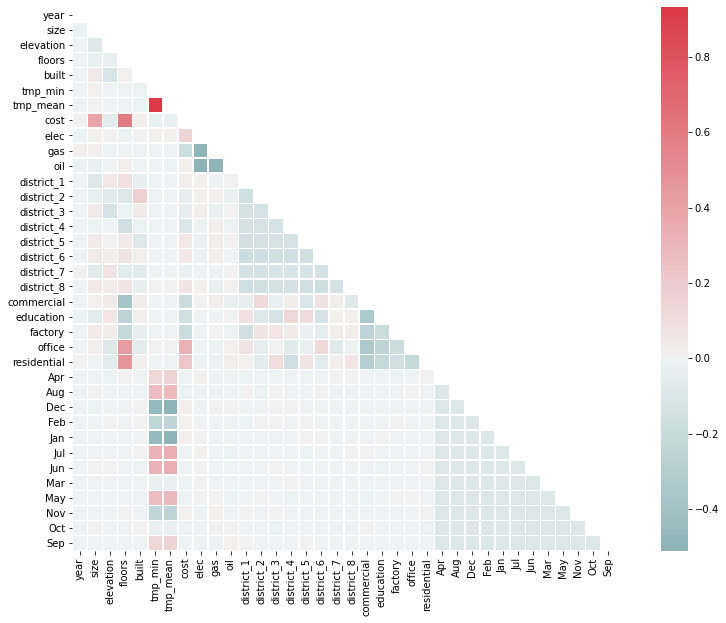

In [301]:

mask = np.triu(np.ones_like(df_oh.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(df_oh.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)
plt.savefig('mytablse.png')

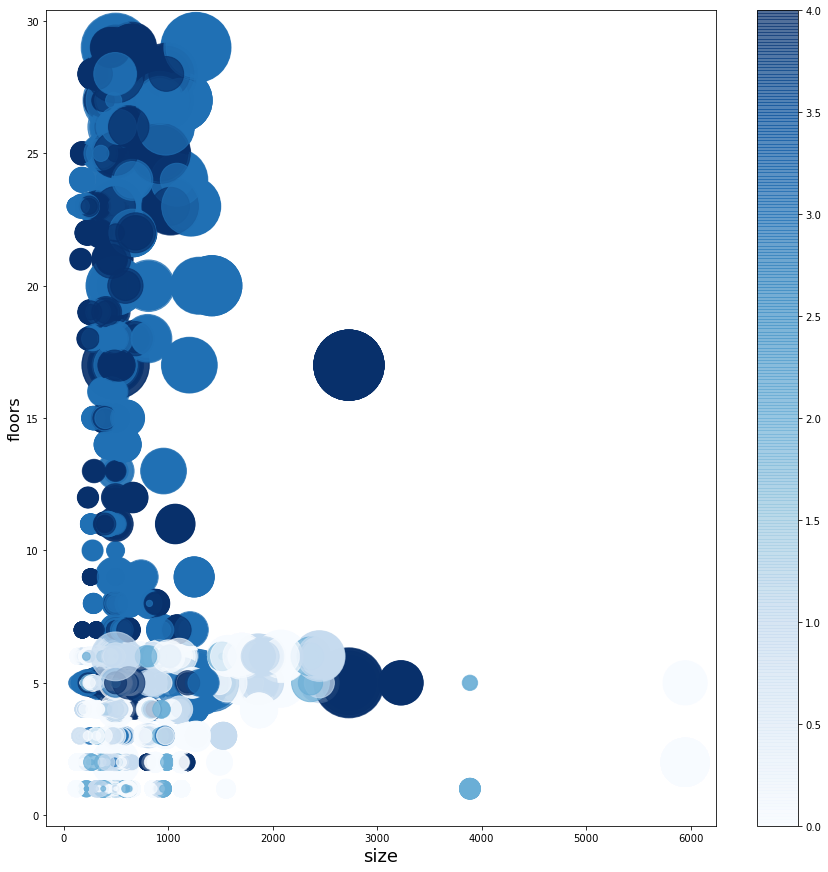

In [302]:
conv_dict={'commercial':1,'education':2,'factory':3,'office':4,'residential':5,'None':np.nan}
df['sector_ord']=df['sector'].apply(conv_dict.get)
sorted_sectors=sorted(df['sector_ord'].unique())
sector_cat= pd.Categorical(df['sector_ord'], ordered=True, categories= sorted_sectors)
sector_cat.codes
plt.scatter(df1['size'], df1['floors'], c=sector_cat.codes, s= df1['cost']/10, alpha=0.7,
            cmap='Blues')
plt.colorbar()
plt.gcf().set_size_inches((15, 15))
plt.xlabel('size', fontsize=18)
plt.ylabel('floors', fontsize=16)
plt.savefig('4d2.png')

lets focus on two pairs of features where a correlation can be seen between them

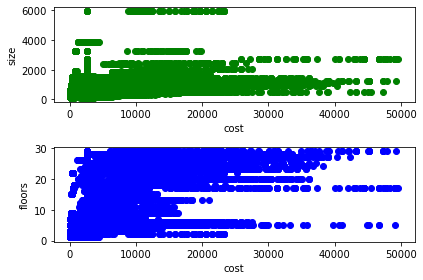

In [303]:
fig, a = plt.subplots(2)
x = df['cost']
y = df['size']
a[0].plot(x, y, 'o', color='green')
a[0].set_ylabel('size')
a[0].set_xlabel('cost')
a[1].plot(df['cost'],df['floors'], 'o', color='blue')
a[1].set_ylabel('floors')
a[1].set_xlabel('cost')

plt.tight_layout()

In [304]:
# conv_dict={'district_1':1,'district_2':2,'district_3':3,'district_4':4,'district_5':5,'district_6':6,'district_7':7,'district_8':8}
# df['district_ord'] = df['district'].apply(lambda x: conv_dict[x])
# df.pivot(columns='source').district_ord.plot(kind = 'hist', stacked=True)


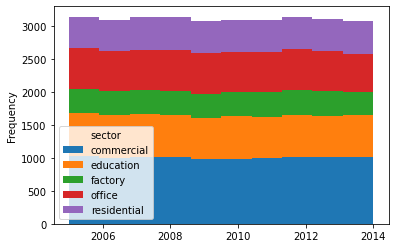

In [305]:
df.pivot(columns='sector').year.plot(kind = 'hist', stacked=True)

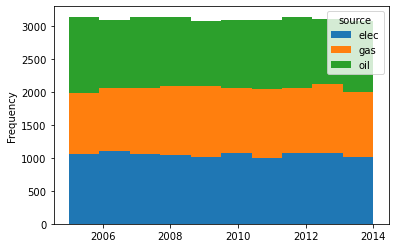

In [306]:
df.pivot(columns='source').year.plot(kind = 'hist', stacked=True)

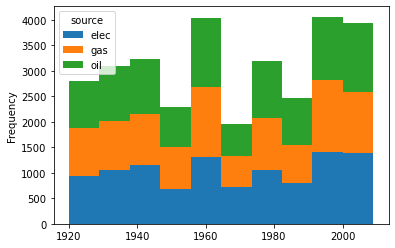

In [307]:
df.pivot(columns='source').built.plot(kind = 'hist', stacked=True)

In [308]:
df.head(10)

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,cost,source,sector_ord
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,6198.82,gas,5
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,6603.26,gas,4
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,1343.66,gas,1
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,608.22,gas,3
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,11811.83,gas,5
6,2008.0,10.0,commercial,489.0,6,37.0,5.0,1934.0,15.7,23.8,1456.83,elec,1
7,2009.0,2.0,commercial,1554.0,4,37.0,1.0,1995.0,14.7,20.3,3070.21,elec,1
8,2008.0,9.0,commercial,599.0,8,337.0,1.0,1948.0,19.6,26.9,1043.49,elec,1
9,2012.0,10.0,office,497.0,4,117.0,11.0,1950.0,19.2,23.9,2091.89,oil,4
10,2013.0,1.0,residential,497.0,3,12.0,3.0,2001.0,9.0,14.8,1262.82,elec,5


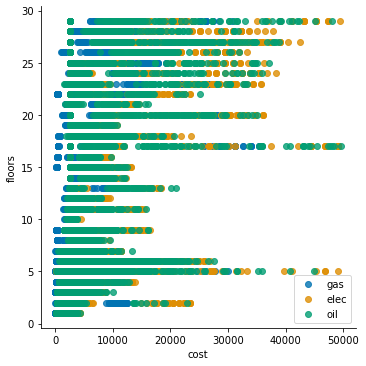

In [309]:
sns.lmplot( x='cost', y='floors', data=df, fit_reg=False, hue='source', legend=False,
          palette='colorblind'
          )
plt.legend(loc='lower right')

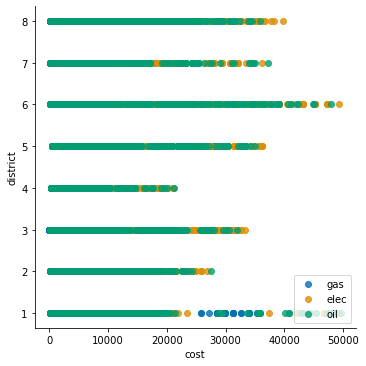

In [310]:
sns.lmplot( x='cost', y='district', data=df, fit_reg=False, hue='source', legend=False,
          palette='colorblind')
plt.legend(loc='lower right')

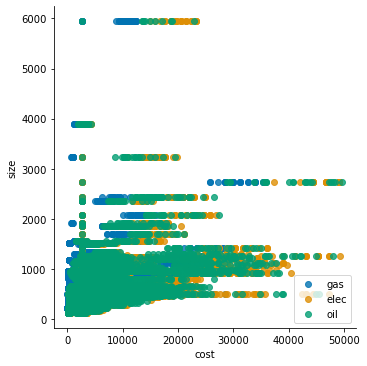

In [311]:
sns.lmplot( x='cost', y='size', data=df, fit_reg=False, hue='source', legend=False,
          palette='colorblind'
          )
plt.legend(loc='lower right')

In [312]:
df.head()

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,cost,source,sector_ord
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,6198.82,gas,5
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,6603.26,gas,4
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,1343.66,gas,1
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,608.22,gas,3
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,11811.83,gas,5


In [313]:
y_energy = df['source']
x_energy = df.iloc[: , [10,4]].copy() 
Xtrain, Xtest, ytrain, ytest = train_test_split(x_energy, y_energy,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted


0.35805330243337197


,index,cost,district,index,source,prediction
0,6150,2633.15,3,6150,oil,gas
1,35331,11925.86,8,35331,oil,elec
2,20059,29392.78,8,20059,elec,elec
3,25377,3681.91,6,25377,oil,gas
4,21230,1005.31,1,21230,elec,gas
...,...,...,...,...,...,...
7762,28823,2838.53,2,28823,elec,gas
7763,26558,126.54,3,26558,gas,gas
7764,16714,4457.98,3,16714,elec,gas
7765,32138,480.44,8,32138,gas,gas


In [314]:
y_energy = df['source']
x_energy = df.iloc[: , [6, 10]].copy() 
Xtrain, Xtest, ytrain, ytest = train_test_split(x_energy, y_energy,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted


0.35818205227243466


,index,floors,cost,index,source,prediction
0,6150,20.0,2633.15,6150,oil,gas
1,35331,26.0,11925.86,35331,oil,oil
2,20059,28.0,29392.78,20059,elec,elec
3,25377,5.0,3681.91,25377,oil,gas
4,21230,4.0,1005.31,21230,elec,gas
...,...,...,...,...,...,...
7762,28823,5.0,2838.53,28823,elec,gas
7763,26558,7.0,126.54,26558,gas,gas
7764,16714,6.0,4457.98,16714,elec,gas
7765,32138,5.0,480.44,32138,gas,gas


In [315]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'cividis'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    print(df.columns)
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

Index(['floors', 'cost', 'source'], dtype='object')


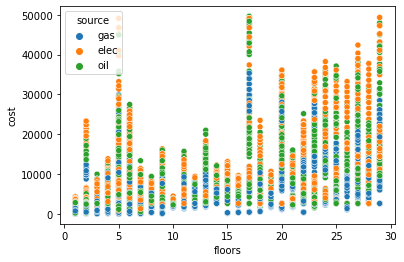

              precision    recall  f1-score   support

        elec       0.48      0.16      0.24      3114
         gas       0.35      0.87      0.50      2991
         oil       0.32      0.08      0.13      3216

    accuracy                           0.36      9321
   macro avg       0.38      0.37      0.29      9321
weighted avg       0.38      0.36      0.28      9321



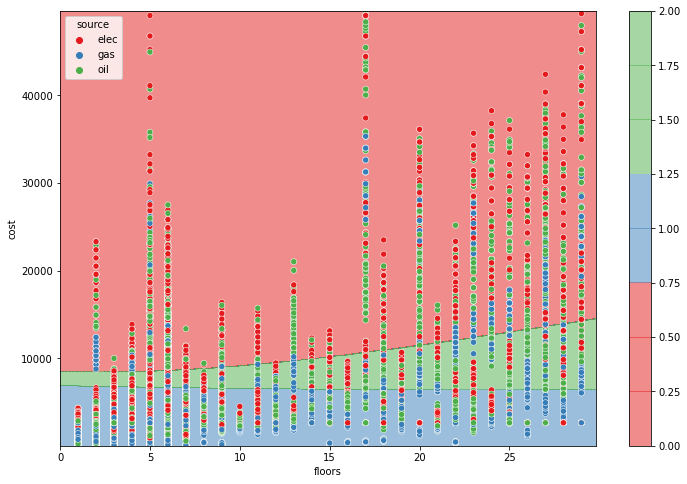

In [316]:
bayes_plot(pd.concat([x_energy,y_energy],axis=1),spread=1)

In [317]:
from io import StringIO
!conda install -y python-graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance

Solving environment: ...working... done

# All requested packages already installed.



**Decision Tree model**

1) Baseline Model

In [318]:
df_copy.isna().sum()


measure         0
year          529
month        1417
sector       2618
size         2626
district        0
elevation     576
floors       1488
built         569
tmp_min      1355
tmp_mean        0
tmp_max      3504
cost         2651
source          0
dtype: int64

In [319]:
df_copy.drop('measure',inplace= True,axis = 1)

In [320]:
df_copy = df_copy[df['year'].notna() & df_copy['month'].notna() & df_copy['sector'].notna() & df_copy['built'].notna()]

df_copy.isna().sum()

year            0
month           0
sector          0
size         2244
district        0
elevation     510
floors       1290
built           0
tmp_min      1167
tmp_mean        0
tmp_max      3029
cost         2284
source          0
dtype: int64

In [321]:
#lets replace the size, elevation, floors, tmp_min,tmp_max,cost with its median value
df_copy['size'] = df_copy['size'].fillna((df_copy['size'].median()))
df_copy['elevation'] = df_copy['elevation'].fillna((df_copy['elevation'].median()))
df_copy['floors'] = df_copy['floors'].fillna((df_copy['floors'].median()))
df_copy['tmp_min'] = df_copy['tmp_min'].fillna((df_copy['tmp_min'].median()))
df_copy['tmp_max'] = df_copy['tmp_max'].fillna((df_copy['tmp_max'].median()))
df_copy['cost'] = df_copy['cost'].fillna((df_copy['cost'].median()))

In [322]:
df_copy.dropna(inplace=True)

In [323]:
df_copy.head()

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost,source
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,34.6,6198.82,gas
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,39.7,6603.26,gas
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,34.2,1343.66,gas
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,32.2,608.22,gas
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,31.6,11811.83,gas


In [324]:
dummy_variables_copy = pd.get_dummies(df_copy.sector,prefix= 'sector',drop_first=True)
df_copy = pd.concat([df_copy,dummy_variables_copy],axis = 1)
df_copy.head()

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost,source,sector_education,sector_factory,sector_office,sector_residential
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,34.6,6198.82,gas,0,0,0,1
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,39.7,6603.26,gas,0,0,1,0
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,34.2,1343.66,gas,0,0,0,0
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,32.2,608.22,gas,0,1,0,0
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,31.6,11811.83,gas,0,0,0,1


In [325]:
temp1 = df_copy['source']

df_copy.drop('source',axis = 1,inplace=True)

df_copy = pd.concat([df_copy,temp1],axis = 1)

df_copy.head()

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost,sector_education,sector_factory,sector_office,sector_residential,source
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,34.6,6198.82,0,0,0,1,gas
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,39.7,6603.26,0,0,1,0,gas
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,34.2,1343.66,0,0,0,0,gas
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,32.2,608.22,0,1,0,0,gas
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,31.6,11811.83,0,0,0,1,gas


In [326]:
from sklearn.model_selection import  train_test_split
df_copy.drop('sector',inplace= True,axis = 1)
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(df_copy.iloc[:,:-1],df_copy.iloc[:,-1],random_state = 42)


In [327]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_TRAIN,Y_TRAIN)

predicted_baseline = decision_tree.predict(X_TEST)

print(predicted_baseline)

print("The accuracy using baseline model in decision tree is",accuracy_score(Y_TEST,predicted_baseline))

['gas' 'elec' 'elec' ... 'oil' 'elec' 'elec']
The accuracy using baseline model in decision tree is 0.6982103772370285


In [328]:
confusion_matrix(Y_TEST,predicted_baseline)

array([[1832,  180,  627],
       [ 180, 1901,  419],
       [ 571,  367, 1690]], dtype=int64)

In [329]:
df.head()

,year,month,sector,size,district,elevation,floors,built,tmp_min,tmp_mean,cost,source,sector_ord
0,2014.0,5.0,residential,460.0,7,55.0,21.0,1967.0,21.9,28.7,6198.82,gas,5
1,2012.0,6.0,office,489.0,2,19.0,18.0,2005.0,26.5,30.7,6603.26,gas,4
2,2011.0,8.0,commercial,215.0,4,37.0,6.0,1981.0,22.3,28.9,1343.66,gas,1
3,2007.0,10.0,factory,218.0,4,37.0,6.0,1990.0,18.2,24.7,608.22,gas,3
5,2006.0,12.0,residential,689.0,5,51.0,22.0,1931.0,10.1,16.2,11811.83,gas,5


**Using the modified data set**

In [330]:
decision_tree.fit(X_TRAIN,Y_TRAIN)

predicted_modified = decision_tree.predict(X_TEST)

print(predicted_modified)

print("The accuracy using modified data set is",accuracy_score(Y_TEST,predicted_modified))

['gas' 'elec' 'elec' ... 'oil' 'elec' 'elec']
The accuracy using modified data set is 0.6971803785245269


In [331]:
confusion_matrix(Y_TEST,predicted_modified)

array([[1812,  179,  648],
       [ 176, 1916,  408],
       [ 563,  378, 1687]], dtype=int64)

**Classification Report**

In [332]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST, predicted_modified))

              precision    recall  f1-score   support

        elec       0.71      0.69      0.70      2639
         gas       0.77      0.77      0.77      2500
         oil       0.62      0.64      0.63      2628

    accuracy                           0.70      7767
   macro avg       0.70      0.70      0.70      7767
weighted avg       0.70      0.70      0.70      7767



Feature: 0, Score: 0.06534
Feature: 1, Score: 0.03372
Feature: 2, Score: 0.12400
Feature: 3, Score: 0.04830
Feature: 4, Score: 0.04101
Feature: 5, Score: 0.06808
Feature: 6, Score: 0.06717
Feature: 7, Score: 0.07306
Feature: 8, Score: 0.07607
Feature: 9, Score: 0.06400
Feature: 10, Score: 0.30008
Feature: 11, Score: 0.00669
Feature: 12, Score: 0.01811
Feature: 13, Score: 0.00805
Feature: 14, Score: 0.00633


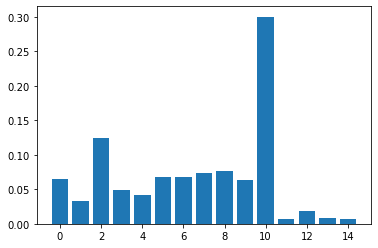

In [333]:
importance = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()